# Life Expectancy & GDP Relation Analisys

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Data Extraction

In [2]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


#### Data Cleaning & Tidying

In [3]:
# Checking if there are mising values in the dataframe
df.isnull().any()

Country                             False
Year                                False
Life expectancy at birth (years)    False
GDP                                 False
dtype: bool

In [4]:
df.columns = ('country','year','life_exp','gdp')

#### Normalizing Data

In [5]:
scaler = MinMaxScaler()
df['life_exp_norm'] = scaler.fit_transform(df[['life_exp']])
df['gdp_norm'] = scaler.fit_transform(df[['gdp']])
df.head()

,country,year,life_exp,gdp,life_exp_norm,gdp_norm
0,Chile,2000,77.3,7.786093e+10,0.899183,0.004059
1,Chile,2001,77.3,7.097992e+10,0.899183,0.003678
2,Chile,2002,77.8,6.973681e+10,0.912807,0.003610
3,Chile,2003,77.9,7.564346e+10,0.915531,0.003936
4,Chile,2004,78.0,9.921039e+10,0.918256,0.005239


#### Describing Data

In [6]:
df.describe()

,year,life_exp,gdp,life_exp_norm,gdp_norm
count,96.000000,96.000000,9.600000e+01,96.000000,96.000000
mean,2007.500000,72.789583,3.880499e+12,0.776283,0.214200
std,4.633971,10.672882,5.197561e+12,0.290814,0.287228
min,2000.000000,44.300000,4.415703e+09,0.000000,0.000000
25%,2003.750000,74.475000,1.733018e+11,0.822207,0.009333
50%,2007.500000,76.750000,1.280220e+12,0.884196,0.070504
75%,2011.250000,78.900000,4.067510e+12,0.942779,0.224535
max,2015.000000,81.000000,1.810000e+13,1.000000,1.000000


## Data Visualization

In [7]:
columns = df.columns
print(columns)

Index(['country', 'year', 'life_exp', 'gdp', 'life_exp_norm', 'gdp_norm'], dtype='object')


In [8]:
countries = pd.unique(df.country)
print(countries)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [9]:
colors = ['blue', 'red', 'purple', 'orange', 'black', 'grey']

In [10]:
years_ticks = [i for i in pd.unique(df.year) if i%2 == 0]
print(years_ticks)

[np.int64(2000), np.int64(2002), np.int64(2004), np.int64(2006), np.int64(2008), np.int64(2010), np.int64(2012), np.int64(2014)]


 ### Countries GDP over Years

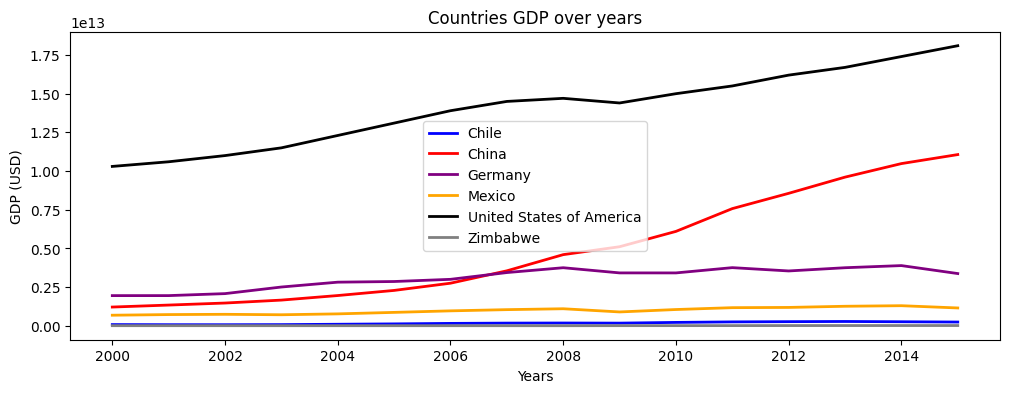

<Figure size 640x480 with 0 Axes>

In [11]:
plt.figure(figsize=(12, 4))

for i, country in enumerate(countries):
    plt.plot(df.year[df.country == country], df.gdp[df.country == country], label=country, linewidth=2, color=colors[i])
    plt.title(f"Countries GDP over years")
    plt.ylabel('GDP (USD)')
    plt.xlabel('Years')
    plt.legend()
    
plt.show()
plt.clf()

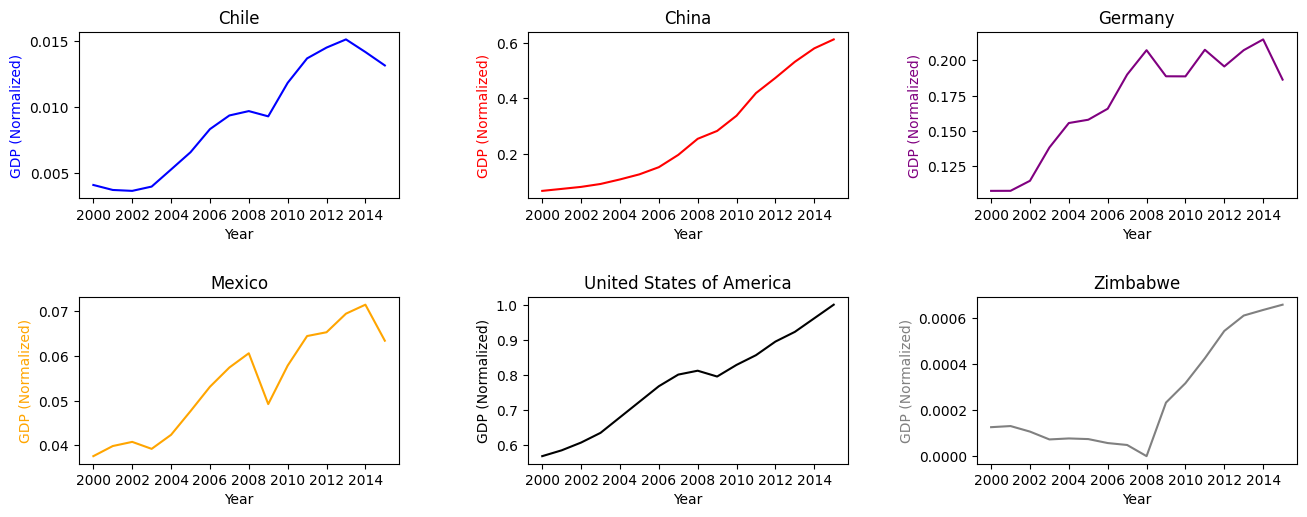

<Figure size 640x480 with 0 Axes>

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(14, 6))
fig.tight_layout(pad=5.0)  # Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

for i, country in enumerate(countries):
    ax1 = axes[i // 3, i % 3]  # Locating the subplot 
    df_country = df[df['country'] == country]

    # GDP Normalized
    ax1.plot(df_country['year'], df_country['gdp_norm'], color=colors[i], label='GDP (Normalized)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('GDP (Normalized)', color=colors[i])
    ax1.set_xticks(years_ticks)
    ax1.set_title(country)
  
plt.show()
plt.clf()

- GDP has increased over time in all six nations. The data indicates economic growth across the board, although the pace of this growth differs between countries.This economic expansion has likely contributed to various social and infrastructural developments, which may have had a positive impact on the quality of life.

### Countries Life Expectancy over Years

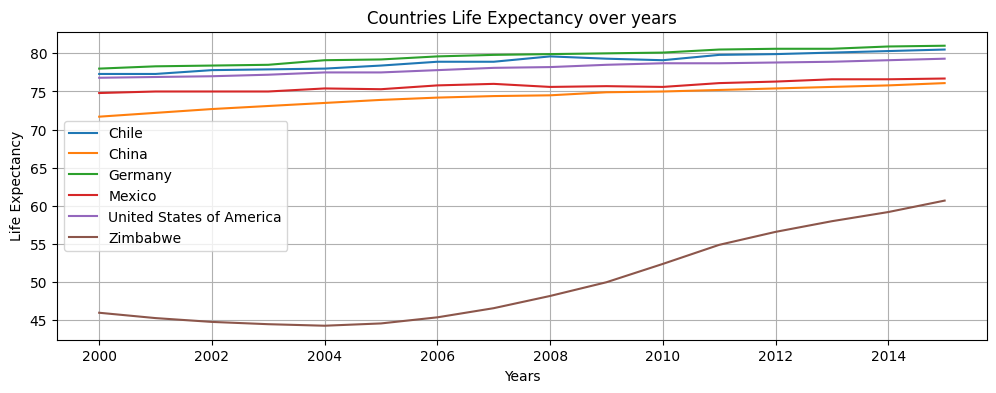

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=(12, 4))

for i in countries:
    plt.plot(df.year[df.country == i], df['life_exp'][df.country == i], label=i)
    plt.title(f"Countries Life Expectancy over years")
    plt.ylabel('Life Expectancy')
    plt.xlabel('Years')
    plt.legend()

plt.grid()
plt.show()
plt.clf()

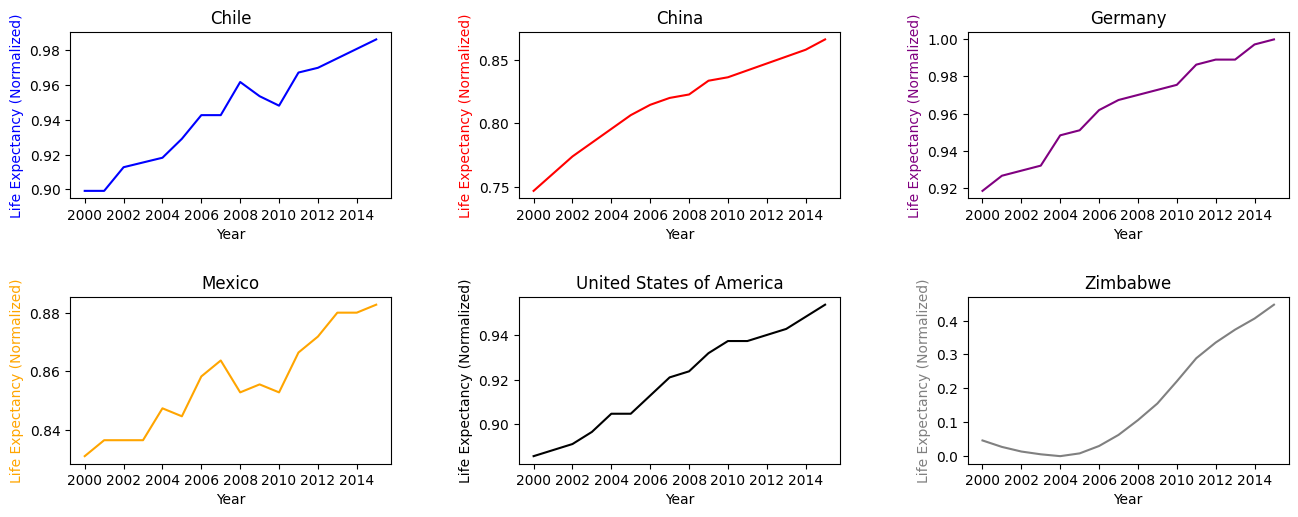

<Figure size 640x480 with 0 Axes>

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(14, 6))
fig.tight_layout(pad=5.0)  # Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

for i, country in enumerate(countries):
    ax1 = axes[i // 3, i % 3]  # Locating the subplot 
    df_country = df[df['country'] == country]

    # Life Expectancy Normalized
    ax1.plot(df_country['year'], df_country['life_exp_norm'], color=colors[i], label='Life Expectancy (Normalized)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Life Expectancy (Normalized)', color=colors[i])
    ax1.set_xticks(years_ticks)
    ax1.set_title(country)
    
  
plt.show()
plt.clf()

- Life expectancy has generally increased over time in the six nations analyzed. The data shows a consistent upward trend in most countries, indicating improvements in healthcare, living standards, and other factors contributing to longer lives. However, the rate of increase varies between countries, with some nations showing more rapid gains than others. 

Actual Mean Life Expectancy across countries:

In [15]:
print(round(np.mean(df.life_exp[df.year == 2015]), 2))

75.72


### GDP & Life Expectancy Correlation

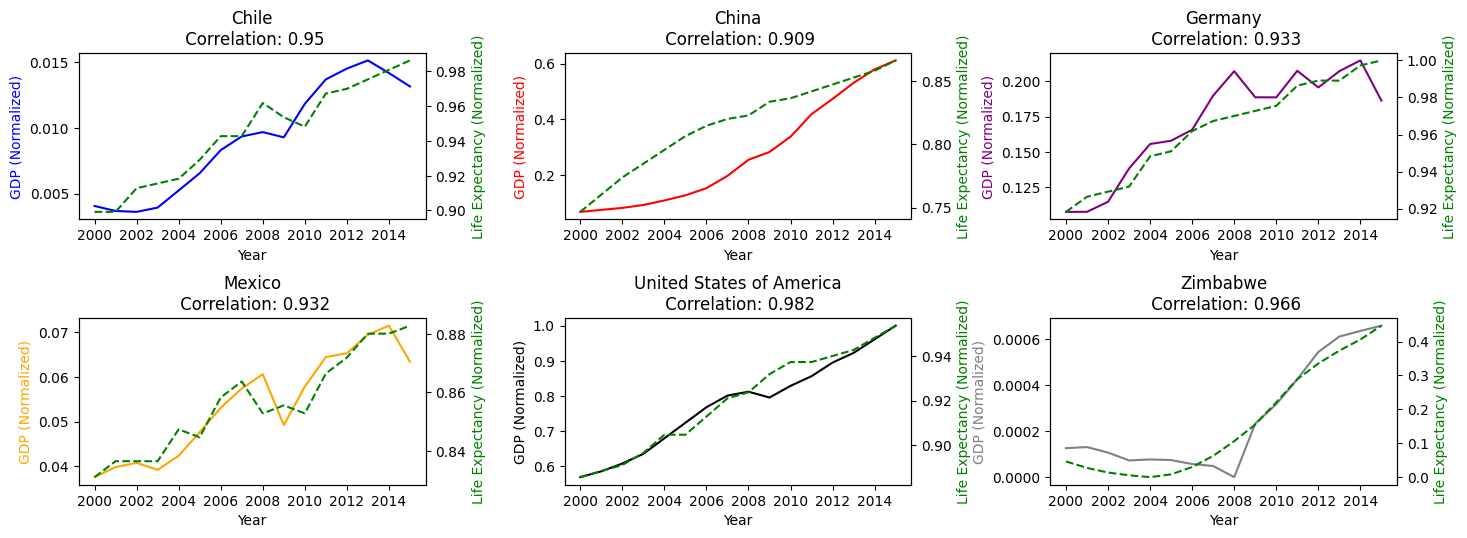

<Figure size 640x480 with 0 Axes>

In [16]:
# Creating a figure with 6 subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 6))
fig.tight_layout(pad=5.0)  # Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

for i, country in enumerate(countries):
    ax1 = axes[i // 3, i % 3]  # Locating the subplot 
    df_country = df[df['country'] == country]

    gdp_le_corr = round(df_country['gdp'].corr(df_country['life_exp_norm']), 3)
    # GDP Normalized
    ax1.plot(df_country['year'], df_country['gdp_norm'], color=colors[i], label='GDP (Normalized)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('GDP (Normalized)', color=colors[i])
    ax1.set_xticks(years_ticks)
    # Creating a second axe on the same subplot
    ax2 = ax1.twinx()
    ax2.plot(df_country['year'], df_country['life_exp_norm'], color='green', linestyle='--', label='Life Expectancy (Normalized)')
    ax2.set_ylabel('Life Expectancy (Normalized)', color='green')
    ax1.set_title(f'{country}\n Correlation: {gdp_le_corr}')

plt.show()
plt.clf()

- There is a strong positive correlation between GDP and life expectancy across the six nations, with a correlation coefficient exceeding 0.93 on average. This suggests that as GDP increases, life expectancy tends to rise as well. The data highlights that higher economic output is generally associated with better healthcare, improved living conditions, and greater access to essential services, all of which contribute to longer life spans. However, exceptions like Chile, which has a relatively low GDP but a high life expectancy, indicate that other factors also play significant roles.

### Statistics Comparison

In [17]:
columns = ['country', 'mean_gdp_norm', 'mean_le_norm']
stat_df = pd.DataFrame(columns=columns)

for i, country in enumerate(countries):

    mean_gdp_norm = np.mean(df['gdp_norm'][df.country == country])
    mean_le_norm = np.mean(df['life_exp_norm'][df.country == country])
    stat_df.loc[i] = [country, mean_gdp_norm, mean_le_norm]
    
stat_df

,country,mean_gdp_norm,mean_le_norm
0,Chile,0.009139,0.943971
1,China,0.273730,0.816417
2,Germany,0.170780,0.963386
3,Mexico,0.053728,0.856097
4,United States of America,0.777570,0.919959
5,Zimbabwe,0.000257,0.157868


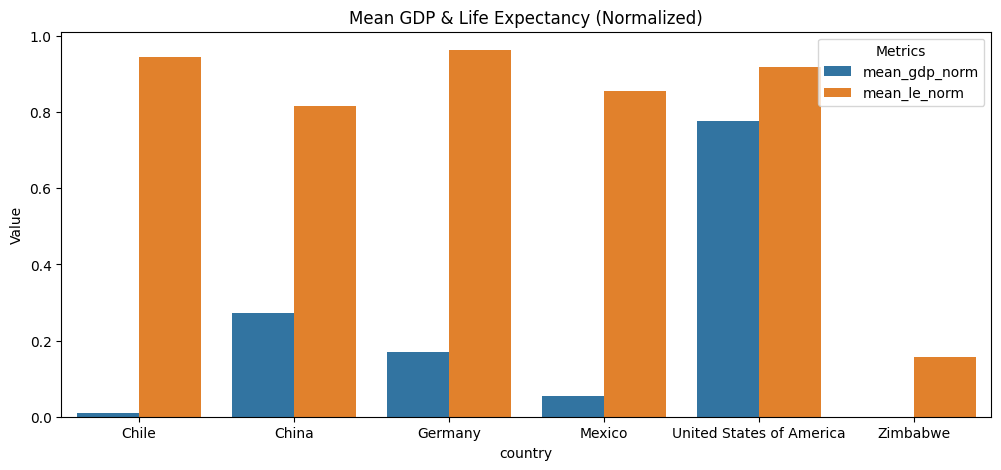

In [18]:
melted_df = pd.melt(stat_df, id_vars='country', var_name='Metrics', value_name='Value')
plt.figure(figsize=(12, 5))
plt.title('Mean GDP & Life Expectancy (Normalized)')
sns.barplot(x='country', y='Value', hue='Metrics', data=melted_df)
plt.show()

## Conclusion
    The analysis of GDP and life expectancy data for six countries from 2000 to 2014 reveals a strong and positive relationship between these two variables. The average correlation, which exceeds 0.9, indicates that as a country's GDP increases, the life expectancy of its population tends to rise significantly. However, cases like Chile, which has a relatively low GDP (the second lowest among the countries analyzed) but the second highest average life expectancy, suggest that factors other than economic growth also play a significant role in influencing longevity and population well-being.